In [1]:
import pandas as pd

# Load the CTG dataset
ctg_data = pd.read_csv('CTG.csv')

# Display the first few rows of the dataset
print(ctg_data.head())
print(ctg_data.info())


       FileName       Date      SegFile      b       e    LBE     LB   AC  \
0  Variab10.txt  12/1/1996  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
2    Fmcs_1.txt   5/3/1996  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
3    Fmcs_1.txt   5/3/1996  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   
4    Fmcs_1.txt   5/3/1996  CTG0005.txt  533.0  1147.0  132.0  132.0  4.0   

    FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
1  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
2  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  0.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  

[5 rows x 40 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data col

Confusion Matrix - Training Set:
[[1141   14    4]
 [  49  140    5]
 [  12    5  118]]
Confusion Matrix - Test Set:
[[475  18   3]
 [ 34  61   6]
 [  6   3  32]]
Classification Report - Training Set:
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97      1159
         2.0       0.88      0.72      0.79       194
         3.0       0.93      0.87      0.90       135

    accuracy                           0.94      1488
   macro avg       0.92      0.86      0.89      1488
weighted avg       0.94      0.94      0.94      1488

Classification Report - Test Set:
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       496
         2.0       0.74      0.60      0.67       101
         3.0       0.78      0.78      0.78        41

    accuracy                           0.89       638
   macro avg       0.82      0.78      0.80       638
weighted avg       0.88      0.89      0.89       638



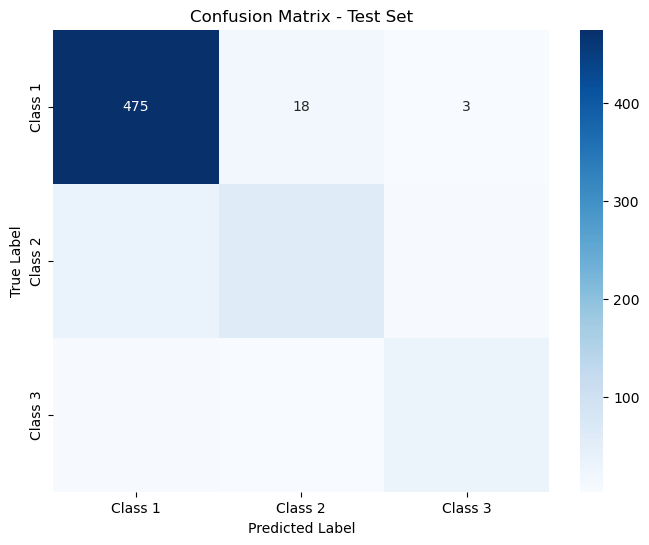

Training Accuracy: 0.94
Test Accuracy: 0.89
The model may be overfitting.


In [1]:
#A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('CTG.csv')

# Remove the unnecessary columns
df = df.drop(columns=['FileName', 'Date', 'SegFile'])

# Remove rows with missing values
df = df.dropna()

# Check if 'NSP' column exists
if 'NSP' in df.columns:
    # Extract features and target variable
    feature_columns = ['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR',
                       'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']
    X = df[feature_columns]
    y = df['NSP']
else:
    raise ValueError("'NSP' column is missing from the dataset.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the training and test set
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrices
print("Confusion Matrix - Training Set:")
print(conf_matrix_train)
print("Confusion Matrix - Test Set:")
print(conf_matrix_test)

# Compute and print classification reports
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)
print("Classification Report - Training Set:")
print(report_train)
print("Classification Report - Test Set:")
print(report_test)

# Visualize confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Analyze performance metrics and infer learning outcome
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

if train_accuracy > test_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting.")
else:
    print("The model is likely fitting well.")

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='Purchase data')

# Separating features (X) and target variable (y)
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df['Payment (Rs)']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results in the notebook
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
Mean Absolute Percentage Error (MAPE): 0.00%
R-squared (R²): 1.0000


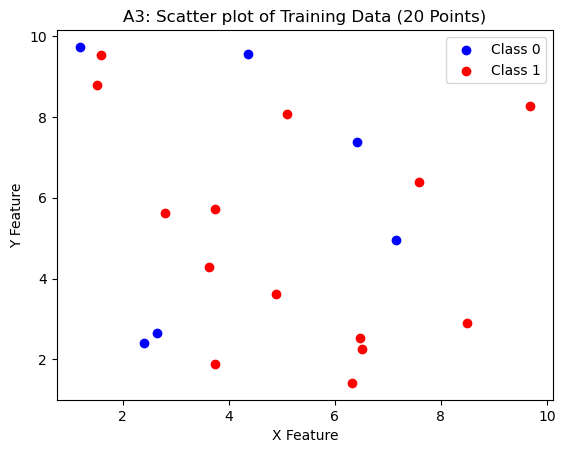

In [4]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Step 2: A3 - Generate 20 random points for training data
np.random.seed(42)
X_train_20 = np.random.uniform(1, 10, (20, 2))  # Generate 20 random points in 2D space
y_train_20 = np.random.choice([0, 1], size=20)  # Randomly assign binary class labels (0 or 1)

# Plot A3
plt.scatter(X_train_20[y_train_20 == 0][:, 0], X_train_20[y_train_20 == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train_20[y_train_20 == 1][:, 0], X_train_20[y_train_20 == 1][:, 1], color='red', label='Class 1')
plt.title('A3: Scatter plot of Training Data (20 Points)')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.legend()
plt.show()



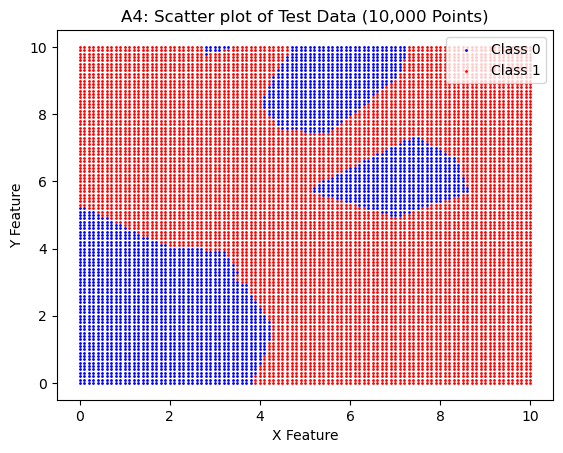

In [5]:
#A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 3: A4 - Generate test set data
X_test_points = np.arange(0, 10.1, 0.1)  # Create a range of values from 0 to 10 with a step of 0.1
X_test_10000 = np.array([[x, y] for x in X_test_points for y in X_test_points])  # Generate 10,000 points in a grid

# kNN classification with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_20, y_train_20)  # Train kNN on the random training data from A3
y_pred_10000 = knn.predict(X_test_10000)  # Predict class labels for the test points

# Plot A4
plt.scatter(X_test_10000[y_pred_10000 == 0][:, 0], X_test_10000[y_pred_10000 == 0][:, 1], color='blue', s=1, label='Class 0')
plt.scatter(X_test_10000[y_pred_10000 == 1][:, 0], X_test_10000[y_pred_10000 == 1][:, 1], color='red', s=1, label='Class 1')
plt.title('A4: Scatter plot of Test Data (10,000 Points)')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.legend()
plt.show()


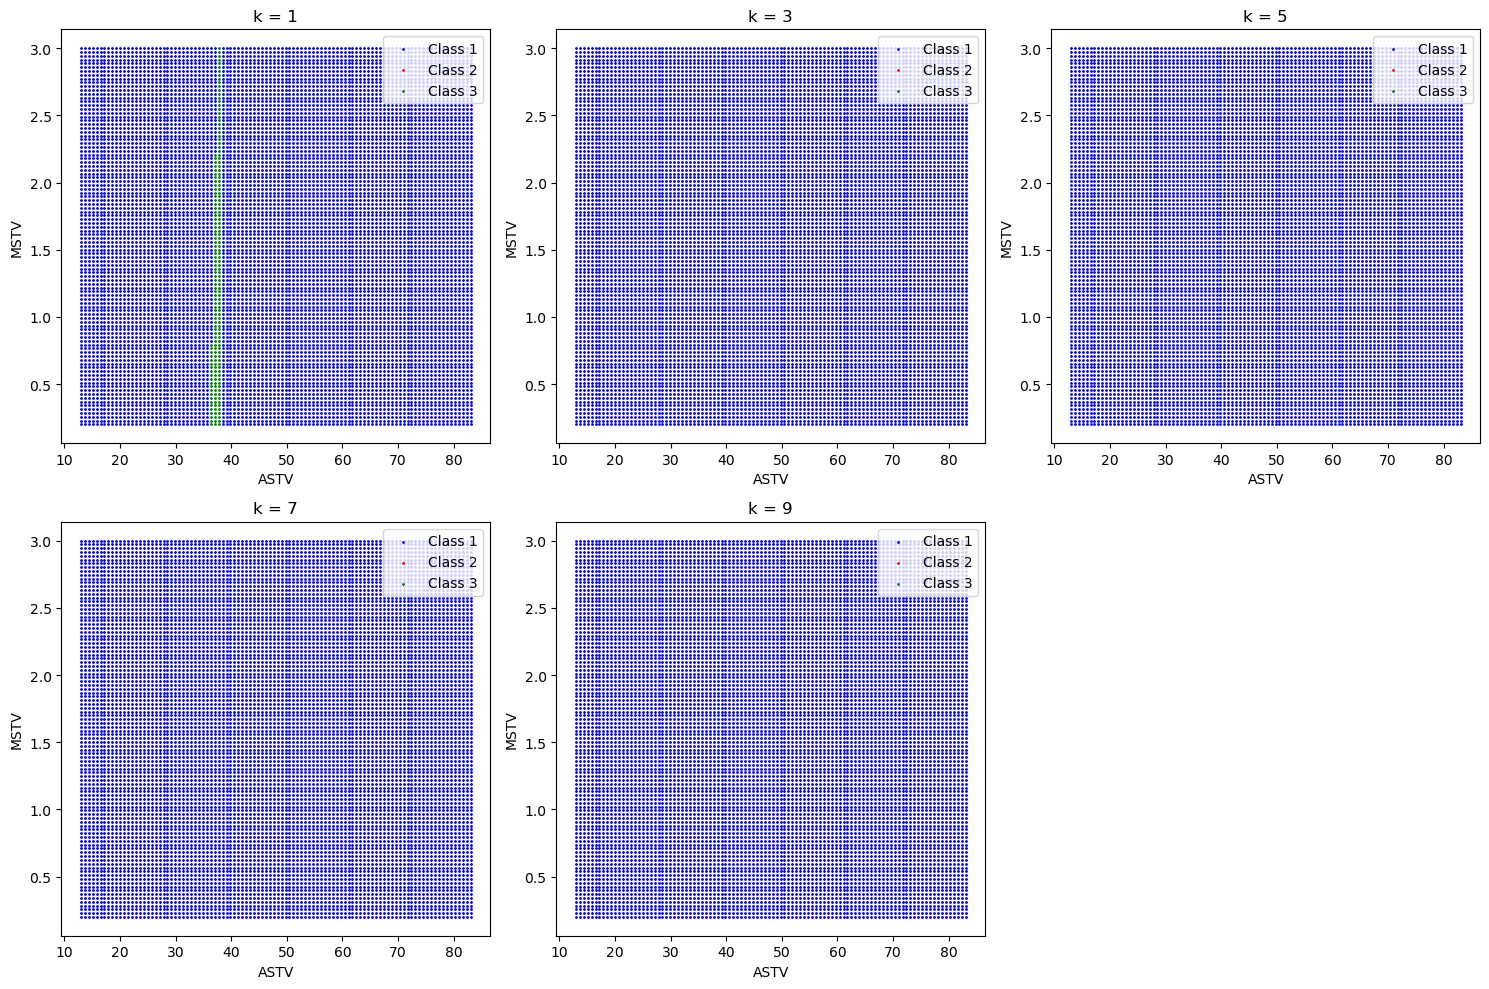

In [20]:
#A5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the CTG dataset
ctg_data = pd.read_csv('CTG.csv')

# Use 'ASTV' and 'MSTV' as features and 'NSP' as the target variable
X = ctg_data[['ASTV', 'MSTV']]
y = ctg_data['NSP']

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Generate 20 data points from training data
X_train_20 = X_train.sample(20, random_state=42).values
y_train_20 = y_train.loc[X_train.index[:20]].values  # Ensure y_train_20 corresponds to X_train_20

# Generate a large test set within the range of the 20 training points
X_min, X_max = X_train_20.min(axis=0), X_train_20.max(axis=0)
X_test_10000 = np.array([[x, y] for x in np.linspace(X_min[0], X_max[0], 100)
                         for y in np.linspace(X_min[1], X_max[1], 100)])

# List of k values to test
k_values = [1, 3, 5, 7, 9]

# Plotting for different k values
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    # Train kNN classifier on the 20 data points with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_20, y_train_20)

    # Predict classes for the test data
    y_pred_10000 = knn.predict(X_test_10000)

    # Plot the results
    plt.subplot(2, 3, i)
    plt.scatter(X_test_10000[y_pred_10000 == 1][:, 0], X_test_10000[y_pred_10000 == 1][:, 1], color='blue', s=1, label='Class 1')
    plt.scatter(X_test_10000[y_pred_10000 == 2][:, 0], X_test_10000[y_pred_10000 == 2][:, 1], color='red', s=1, label='Class 2')
    plt.scatter(X_test_10000[y_pred_10000 == 3][:, 0], X_test_10000[y_pred_10000 == 3][:, 1], color='green', s=1, label='Class 3')
    plt.title(f'k = {k}')
    plt.xlabel('ASTV')
    plt.ylabel('MSTV')
    plt.legend()

plt.tight_layout()
plt.show()


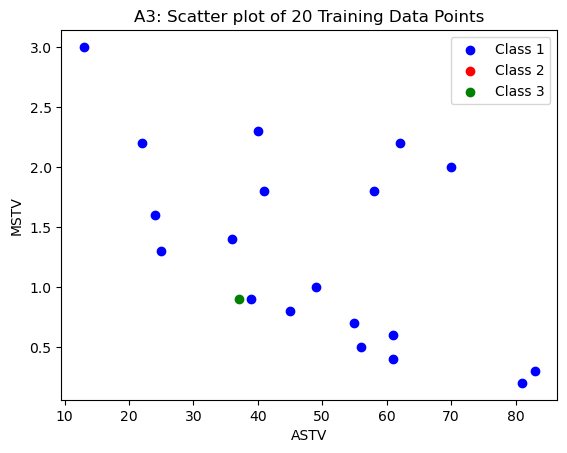

In [1]:
#A6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the CTG dataset
ctg_data = pd.read_csv('CTG.csv')

# Use 'ASTV' and 'MSTV' as features and 'NSP' as the target variable
X = ctg_data[['ASTV', 'MSTV']]
y = ctg_data['NSP']

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# A3: Generate 20 data points from training data
X_train_20 = X_train.sample(20, random_state=42).values
y_train_20 = y_train.loc[X_train.index[:20]].values  # Ensure y_train_20 corresponds to X_train_20

# Plot A3: Scatter plot of the 20 training data points
plt.scatter(X_train_20[y_train_20 == 1][:, 0], X_train_20[y_train_20 == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X_train_20[y_train_20 == 2][:, 0], X_train_20[y_train_20 == 2][:, 1], color='red', label='Class 2')
plt.scatter(X_train_20[y_train_20 == 3][:, 0], X_train_20[y_train_20 == 3][:, 1], color='green', label='Class 3')
plt.title('A3: Scatter plot of 20 Training Data Points')
plt.xlabel('ASTV')
plt.ylabel('MSTV')
plt.legend()
plt.show()

In [2]:
# A7: Hyper-Parameter Tuning using GridSearchCV for k-NN Classifier

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the CTG dataset
ctg_data = pd.read_csv('CTG.csv')

# Use 'ASTV' and 'MSTV' as features and 'NSP' as the target variable
X = ctg_data[['ASTV', 'MSTV']]
y = ctg_data['NSP']

# Check and handle missing values in X and y
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Remove rows where target variable y is NaN
non_nan_indices = ~pd.isna(y)
X = X[non_nan_indices]
y = y[non_nan_indices]

# Convert y to integer type
y = y.astype(int)

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for k values
param_grid = {'n_neighbors': np.arange(1, 21, 2)}

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best k value
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

# Display the best k value and its corresponding accuracy
print(f'Best k value: {best_k}')
print(f'Best cross-validation accuracy: {best_score:.4f}')

# Train the k-NN classifier with the best k value on the full training set
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = knn_best.score(X_test, y_test)
print(f'Test set accuracy with k={best_k}: {test_score:.4f}')

Best k value: 13
Best cross-validation accuracy: 0.8421
Test set accuracy with k=13: 0.8417
